In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cubic_potentials as cp
import importlib as im

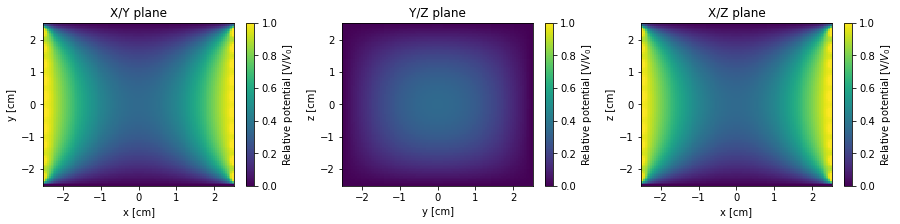

In [50]:
## make a plot of the potentials
im.reload(cp)

side_length = 5 ## cm

x = np.linspace(-side_length/2,side_length/2,100)
y = np.linspace(-side_length/2,side_length/2,100)

xg, yg = np.meshgrid(x, y)
zs = np.zeros_like(xg)

Vxy = cp.V(xg,yg,zs, a=side_length)
Vyz = cp.V(zs,xg,yg, a=side_length)
Vxz = cp.V(xg,zs,yg, a=side_length)

plt.figure(figsize=(15,3))

pot_vec = [Vxy, Vyz, Vxz]
xlab_vec = ["x [cm]","y [cm]","x [cm]"]
ylab_vec = ["y [cm]","z [cm]","z [cm]"]
title_vec = ["X/Y plane", "Y/Z plane", "X/Z plane"]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.pcolormesh(xg,yg,pot_vec[i])
    plt.xlabel(xlab_vec[i])
    plt.ylabel(ylab_vec[i])
    plt.colorbar(label="Relative potential [V/$V_0$]")
    plt.clim(0,1)
    plt.title(title_vec[i])

plt.subplots_adjust(wspace=0.25)

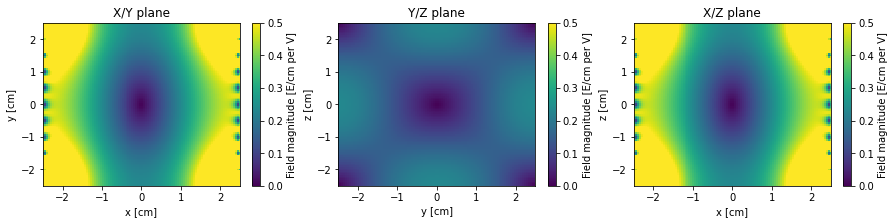

In [82]:
## make a plot of the fields

plt.figure(figsize=(15,3))

locs = [xg,yg,zs]

coords = [ [0, 1, 2],
           [2, 0, 1],
           [0, 2, 1]]

for i in range(3):
    
    cx, cy, cz = locs[coords[i][0]], locs[coords[i][1]], locs[coords[i][2]]
    Ex, Ey, Ez = cp.E(cx, cy, cz, a=side_length)
    Enorm = np.sqrt(Ex**2 + Ey**2 + Ez**2)

    Evec = [Ex, Ey, Ez]

    xidx = np.argmin(np.abs(np.array(coords[i])-0))
    yidx = np.argmin(np.abs(np.array(coords[i])-1))

    plt.subplot(1,3,i+1)
    plt.pcolormesh(xg,yg,Enorm)
    plt.xlabel(xlab_vec[i])
    plt.ylabel(ylab_vec[i])
    plt.colorbar(label="Field magnitude [E/cm per V]")
    plt.clim(0,0.5)
    plt.title(title_vec[i])

    #plt.streamplot(xg, yg, Evec[xidx], Evec[yidx], color='white')

    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)

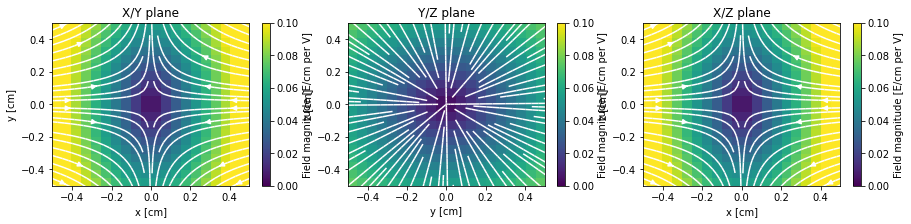

In [89]:
## same thing but zoom to the center

plt.figure(figsize=(15,3))

for i in range(3):
    
    cx, cy, cz = locs[coords[i][0]], locs[coords[i][1]], locs[coords[i][2]]
    Ex, Ey, Ez = cp.E(cx, cy, cz, a=side_length)
    Enorm = np.sqrt(Ex**2 + Ey**2 + Ez**2)

    Evec = [Ex, Ey, Ez]

    xidx = np.argmin(np.abs(np.array(coords[i])-0))
    yidx = np.argmin(np.abs(np.array(coords[i])-1))

    plt.subplot(1,3,i+1)
    plt.pcolormesh(xg,yg,Enorm)
    plt.xlabel(xlab_vec[i])
    plt.ylabel(ylab_vec[i])
    plt.colorbar(label="Field magnitude [E/cm per V]")
    plt.clim(0,0.1)
    plt.title(title_vec[i])

    plt.streamplot(xg, yg, Evec[xidx], Evec[yidx], color='white', density=5)

    plt.xlim(-0.5,0.5)
    plt.ylim(-0.5,0.5)